In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import random
import string
import hashlib
import json


#Loading data
columns_name = ['id', 'date', 'latitude', 'longitude' ]
df = pd.read_csv('../Data_Anom/real_data_set.csv', names = columns_name, sep = '\t')
df['date'] = df['date'].str.slice(stop = 16)
df['date'] = pd.to_datetime(df['date'], format = "%Y-%m-%d %H:%M")

df['week'] = df['date'].dt.isocalendar().week

In [2]:
df

,id,date,latitude,longitude,week
0,1,2015-03-04 00:35:00,4.870147,45.772140,10
1,1,2015-03-04 00:35:00,4.870218,45.772095,10
2,1,2015-03-04 00:35:00,4.870210,45.772072,10
3,1,2015-03-04 00:35:00,4.870210,45.772072,10
4,1,2015-03-04 00:35:00,4.870210,45.772072,10
...,...,...,...,...,...
34551844,110,2015-03-12 16:23:00,2.343094,48.891650,11
34551845,110,2015-03-12 16:23:00,2.343094,48.891650,11
34551846,110,2015-03-12 16:23:00,2.343094,48.891649,11
34551847,110,2015-03-12 16:23:00,2.343094,48.891649,11


In [4]:
df.isnull().sum()

id           0
date         0
latitude     0
longitude    0
week         0
dtype: int64

In [4]:
df.duplicated().sum()

17896957

           id                date  latitude  longitude  week
0           1 2015-03-04 00:35:00  4.870147  45.772140    10
1           1 2015-03-04 00:35:00  4.870218  45.772095    10
2           1 2015-03-04 00:35:00  4.870210  45.772072    10
3           1 2015-03-04 00:35:00  4.870210  45.772072    10
4           1 2015-03-04 00:35:00  4.870210  45.772072    10
...       ...                 ...       ...        ...   ...
34551844  110 2015-03-12 16:23:00  2.343094  48.891650    11
34551845  110 2015-03-12 16:23:00  2.343094  48.891650    11
34551846  110 2015-03-12 16:23:00  2.343094  48.891649    11
34551847  110 2015-03-12 16:23:00  2.343094  48.891649    11
34551848  110 2015-03-12 19:29:00  2.343127  48.891772    11

[34551849 rows x 5 columns]


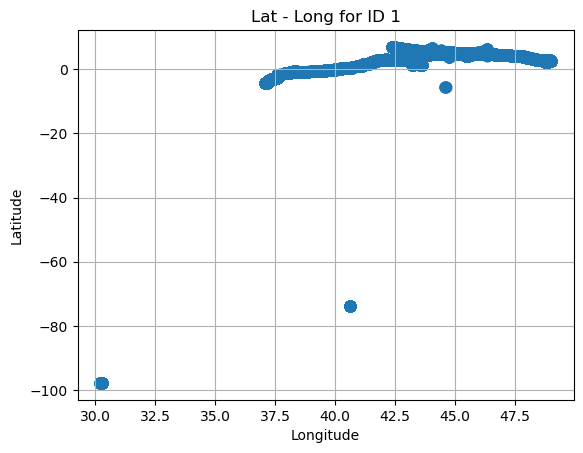

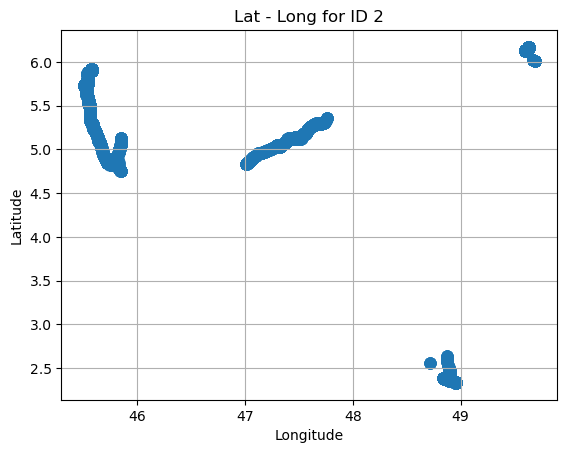

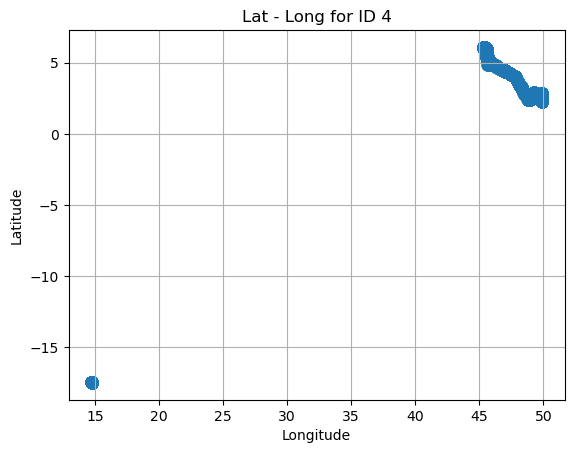

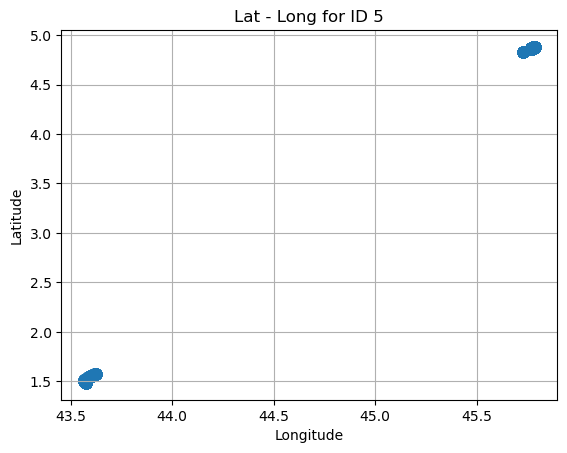

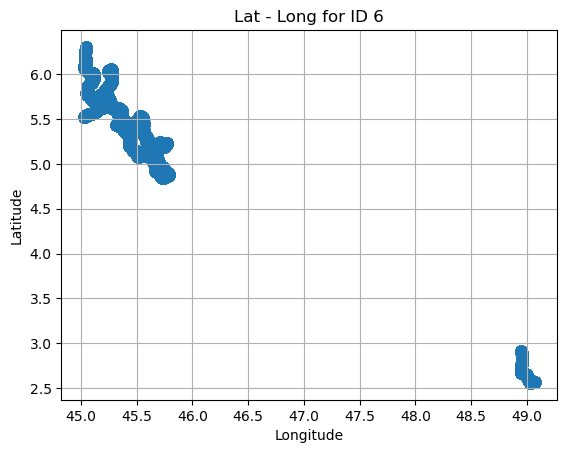

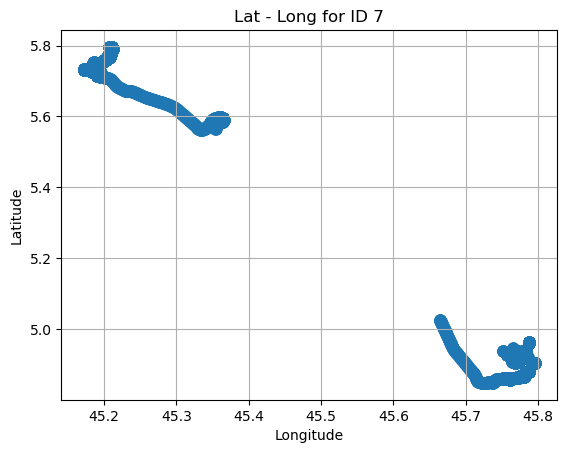

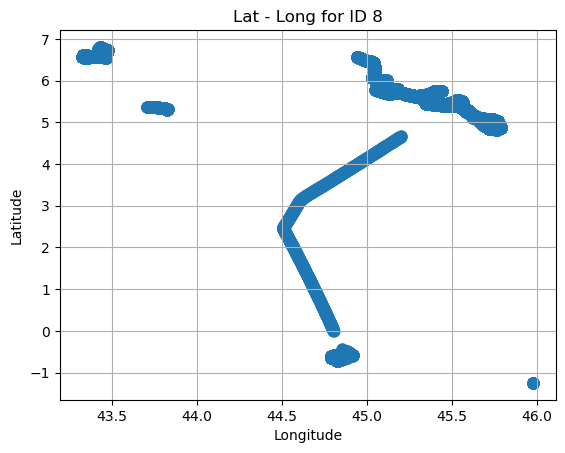

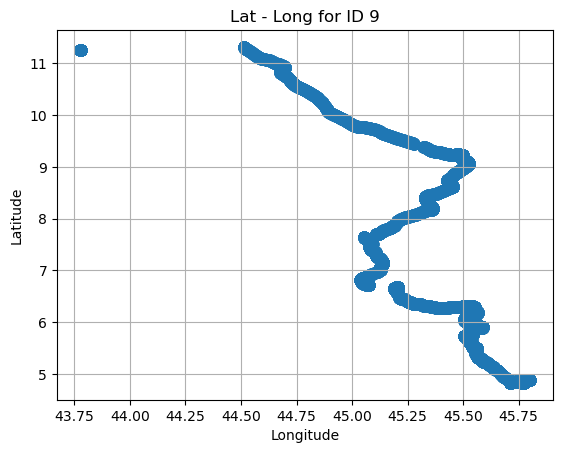

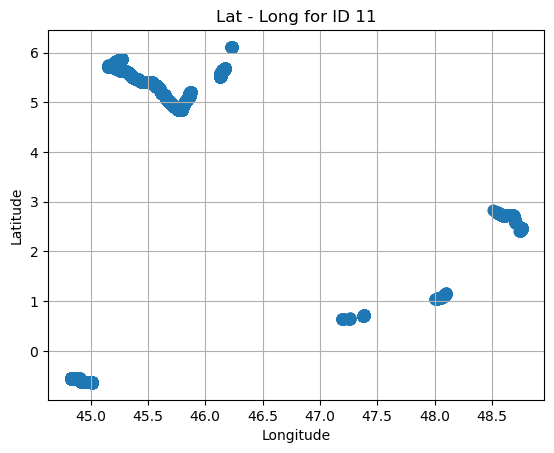

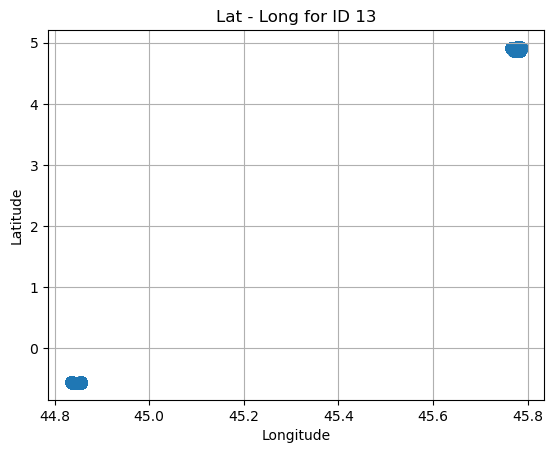

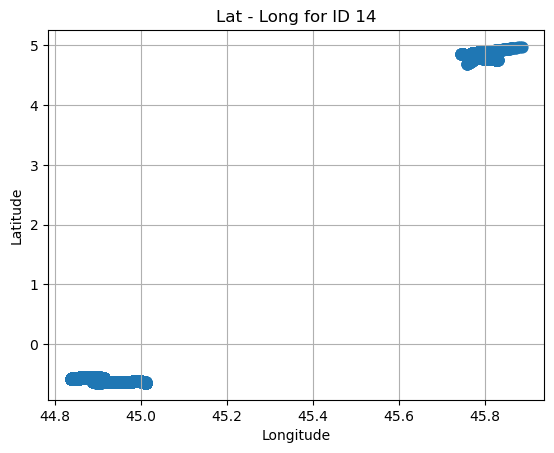

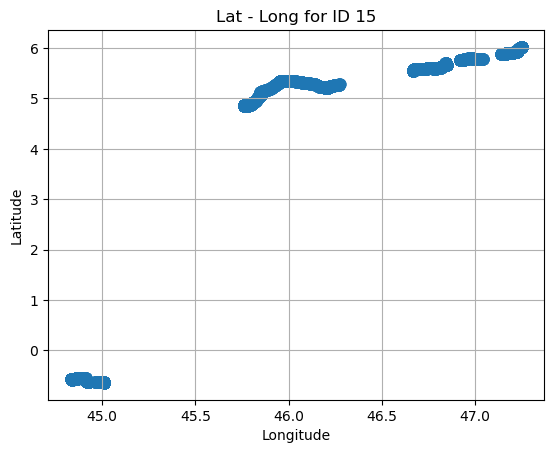

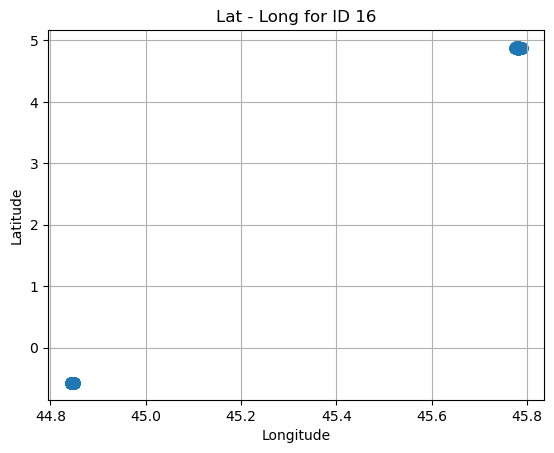

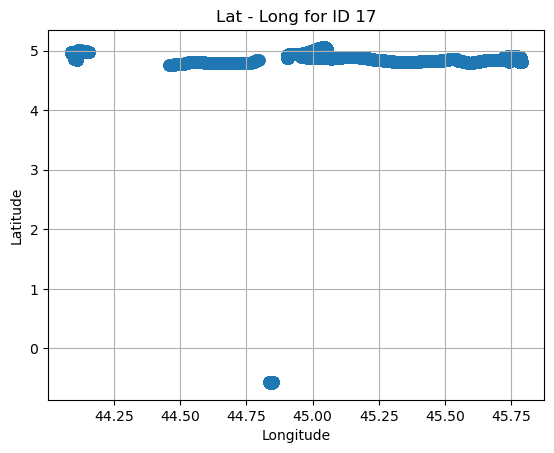

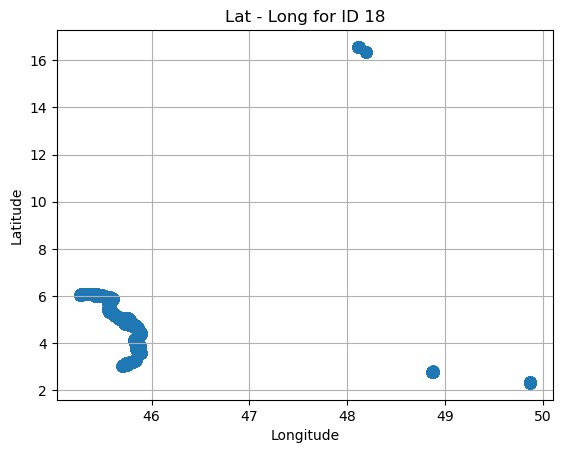

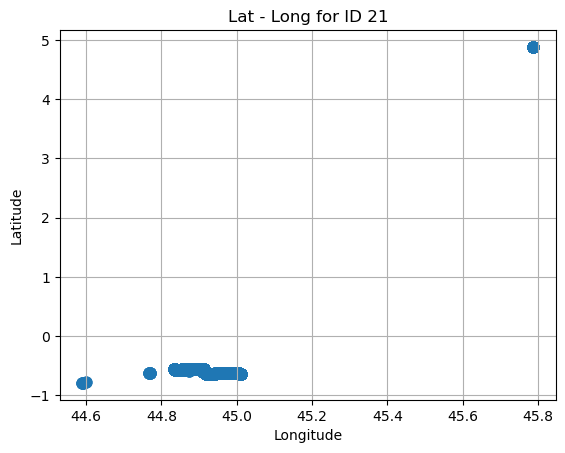

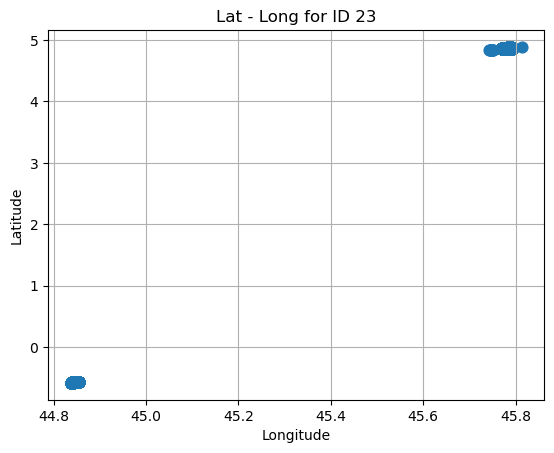

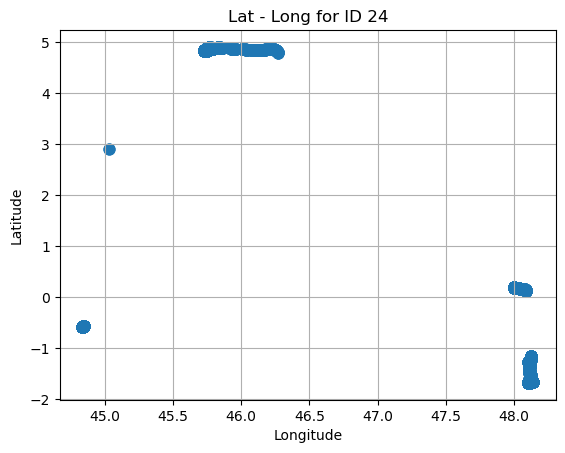

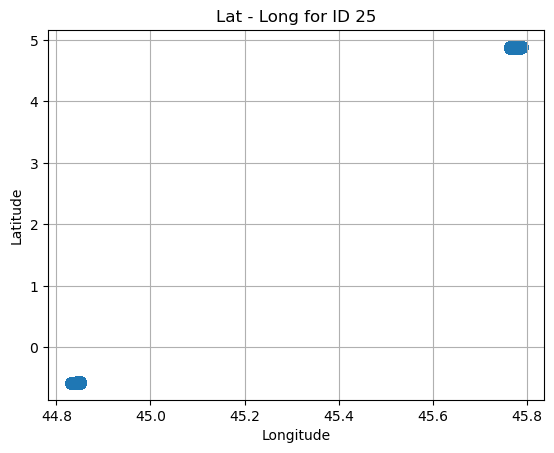

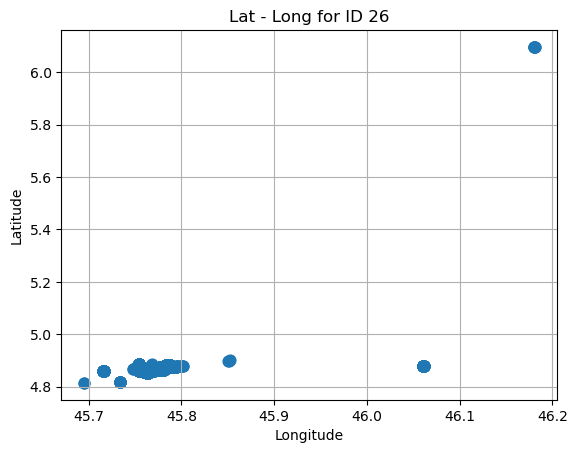

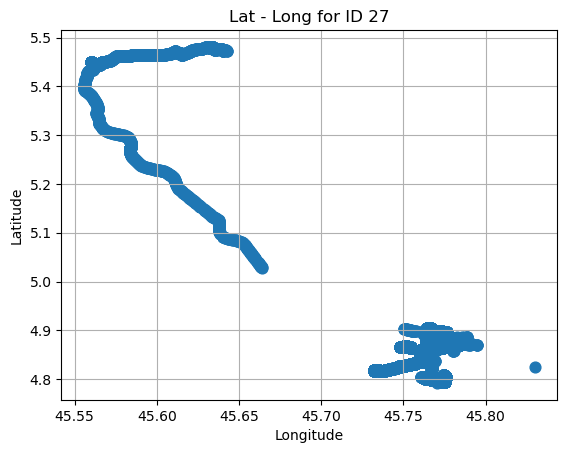

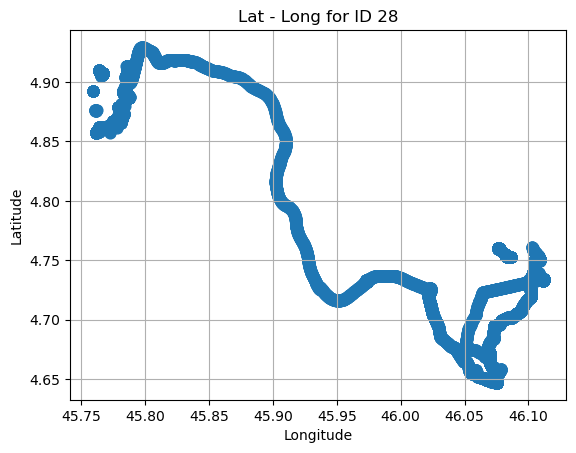

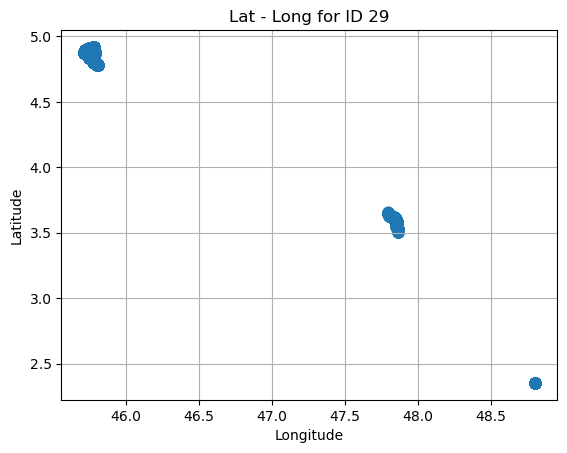

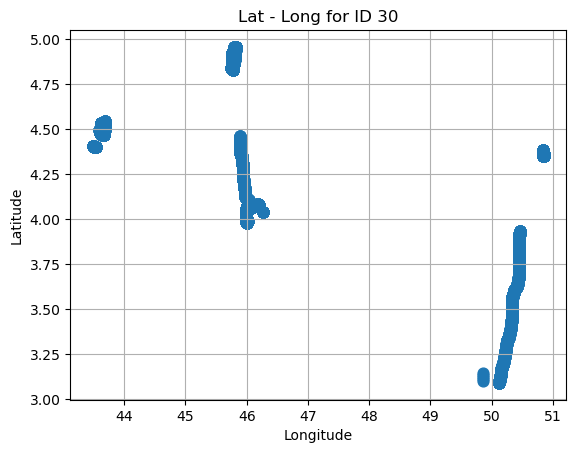

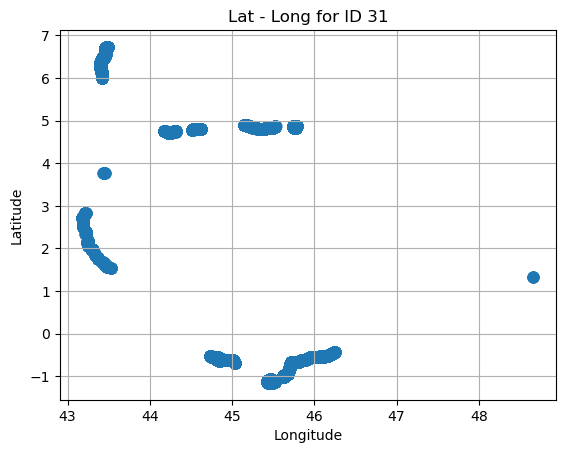

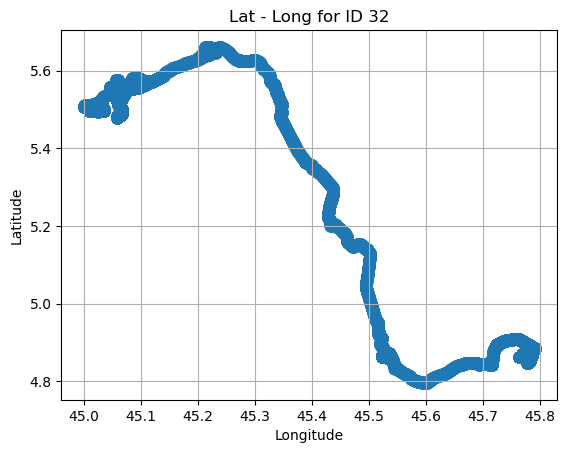

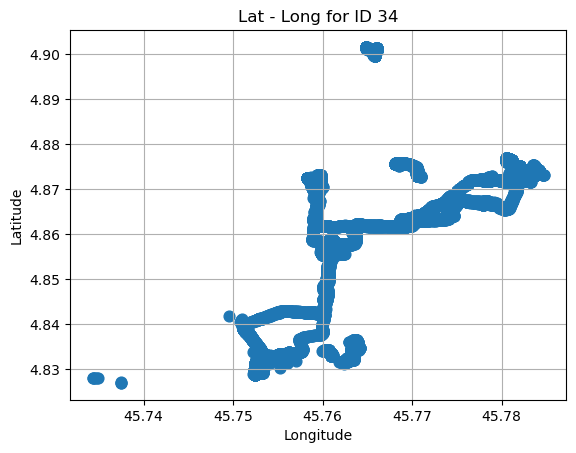

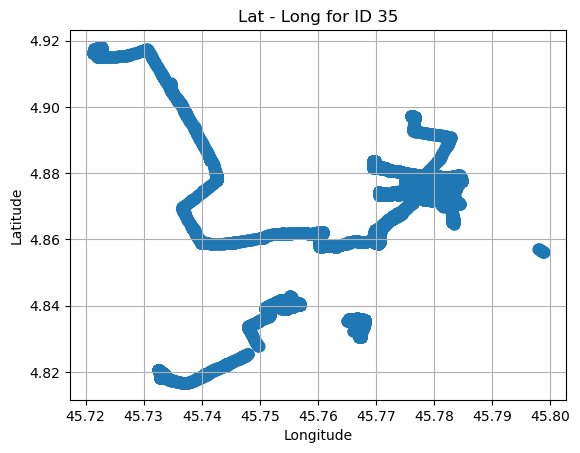

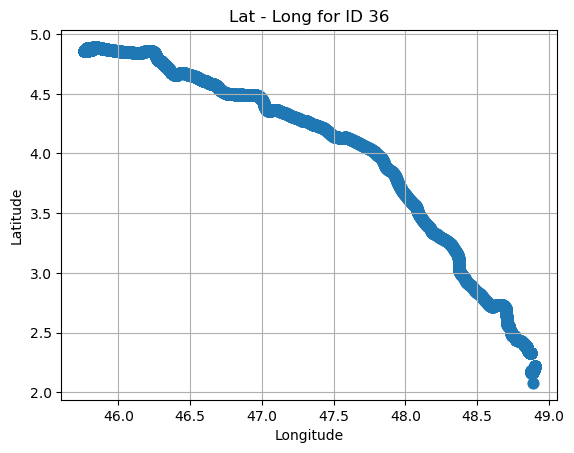

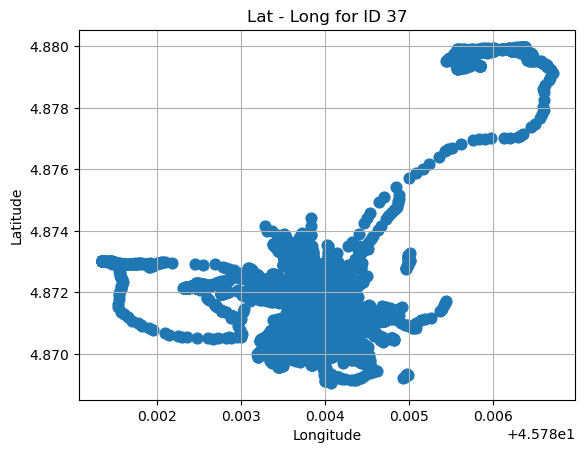

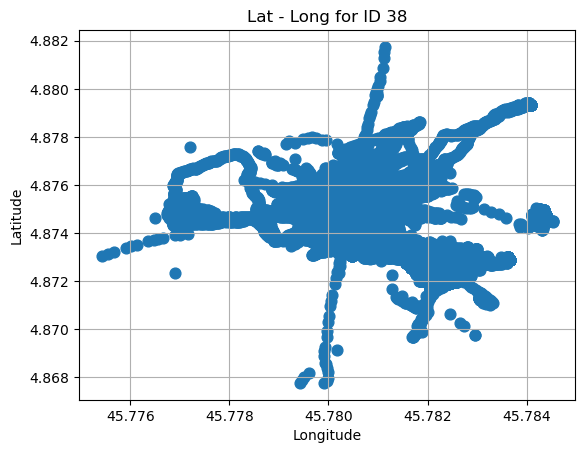

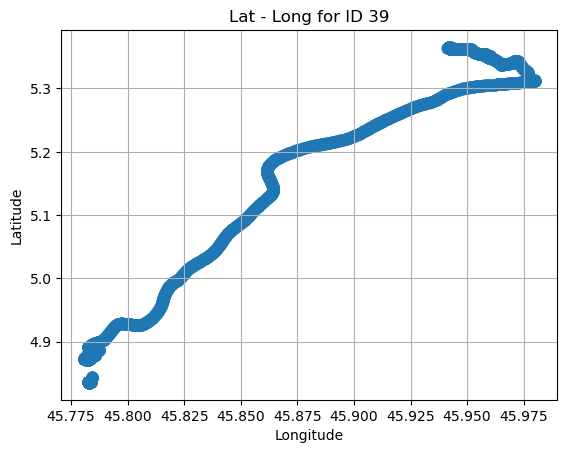

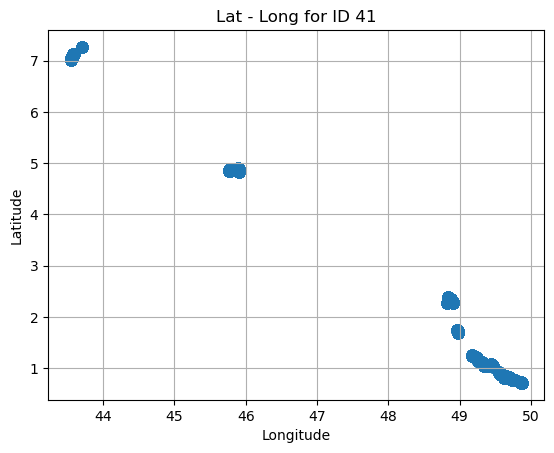

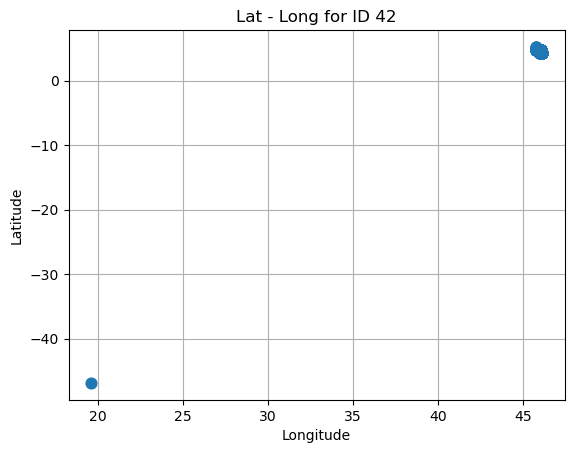

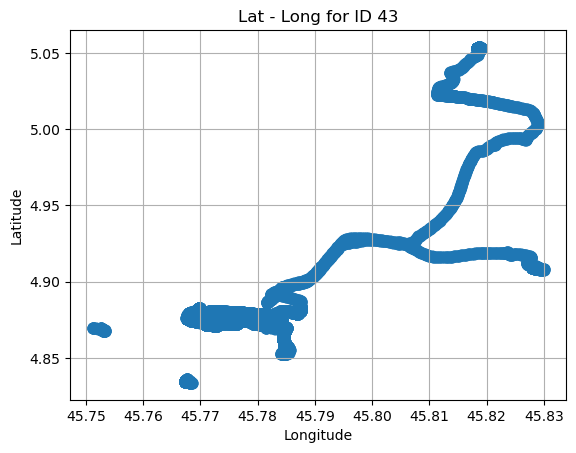

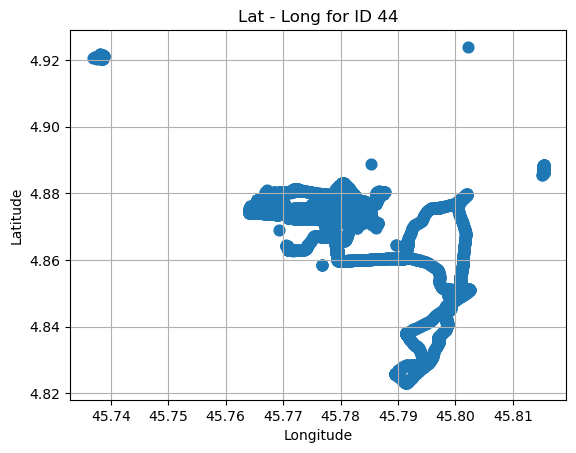

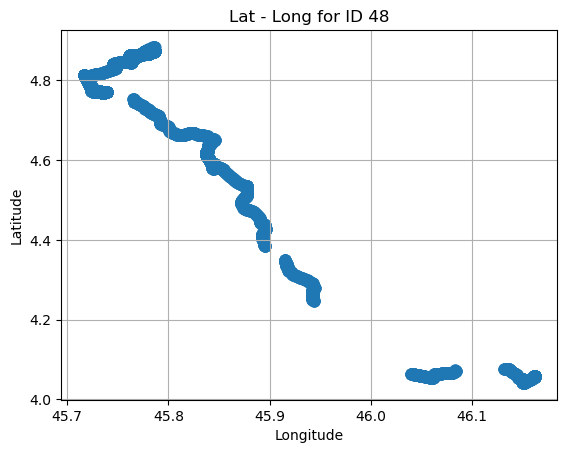

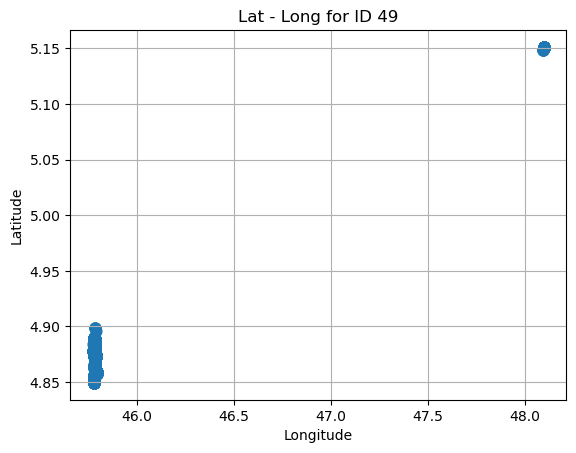

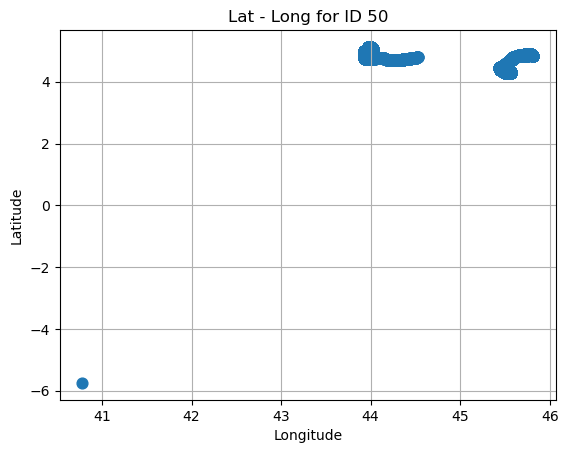

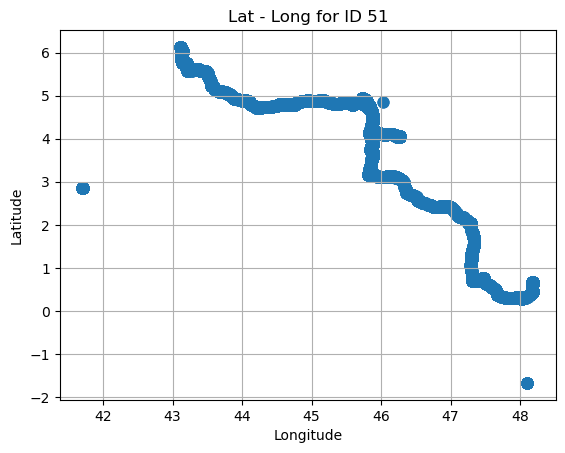

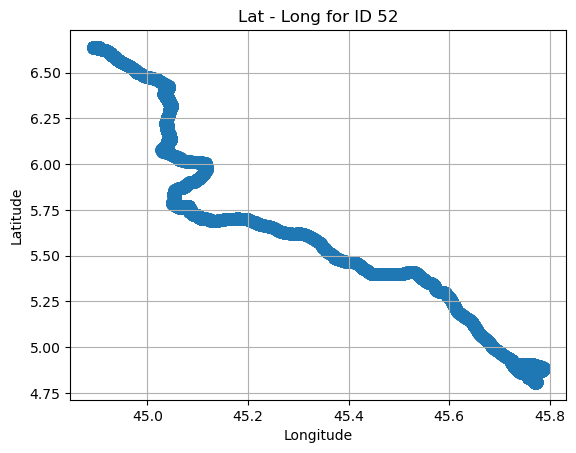

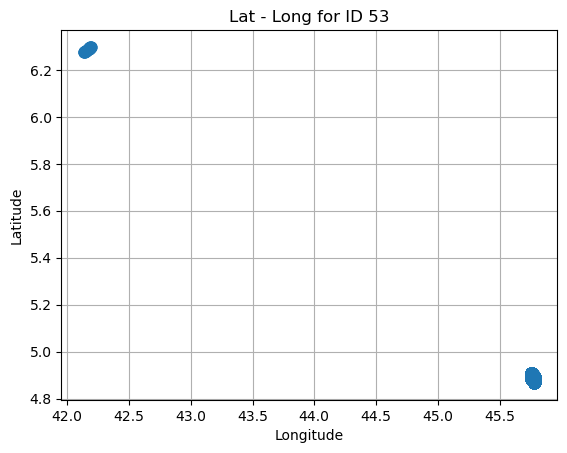

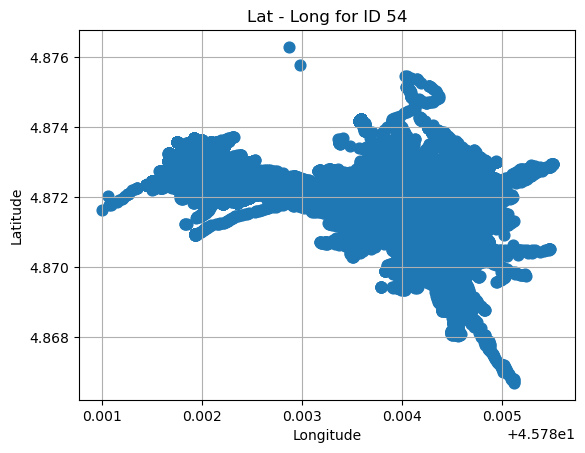

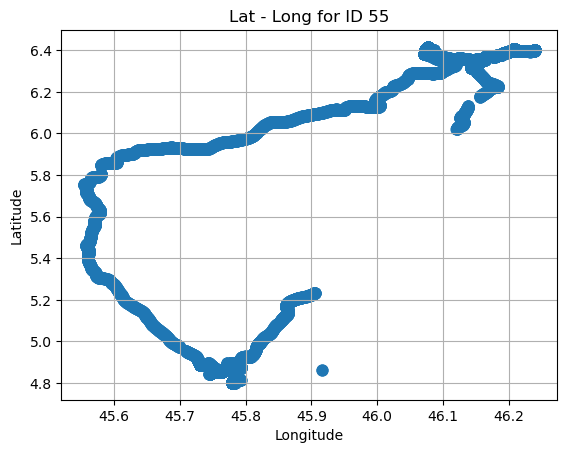

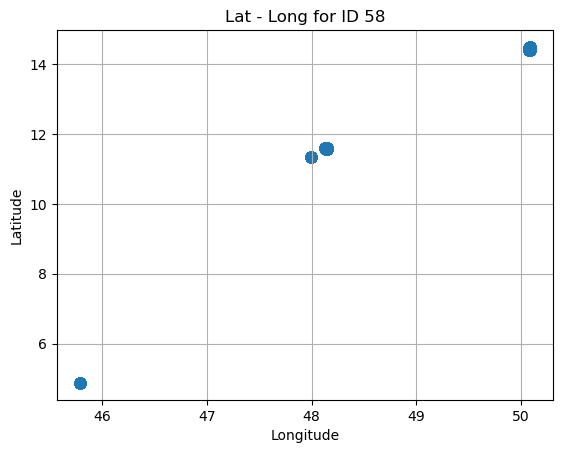

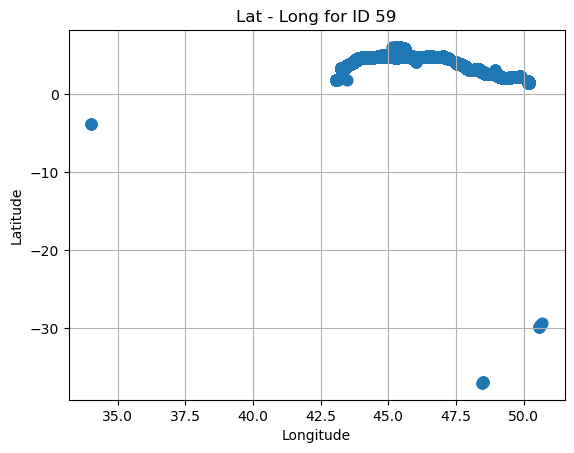

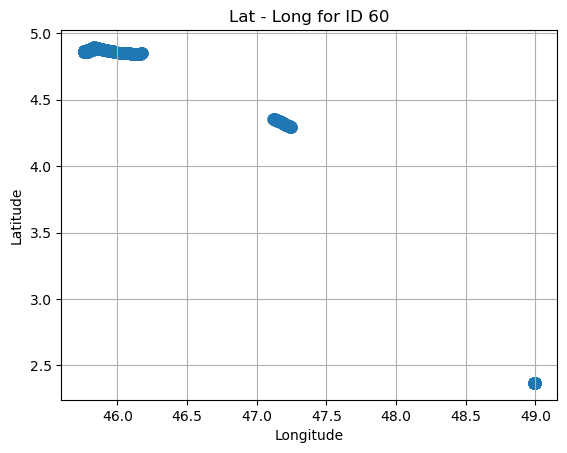

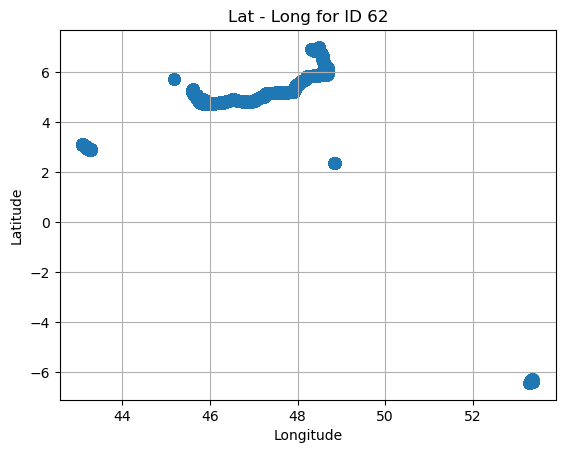

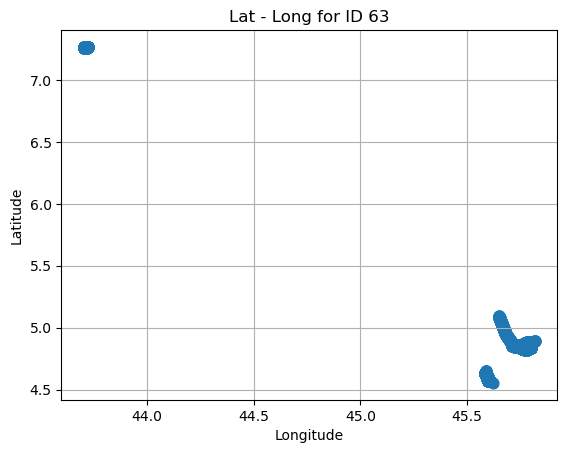

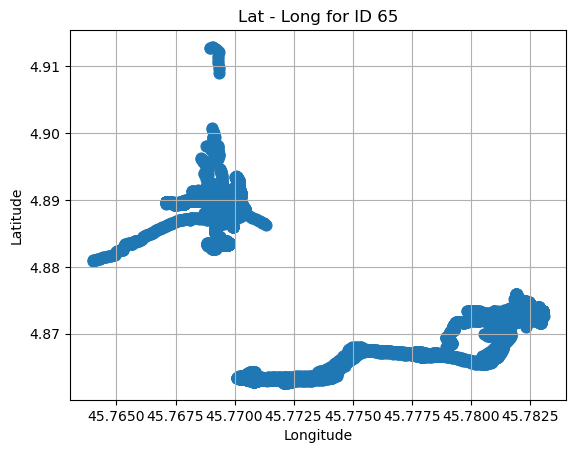

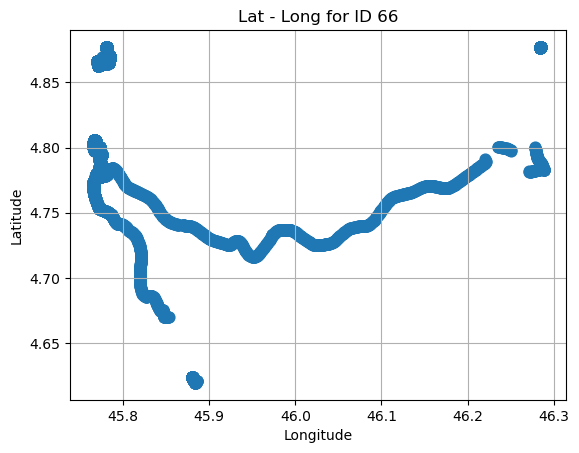

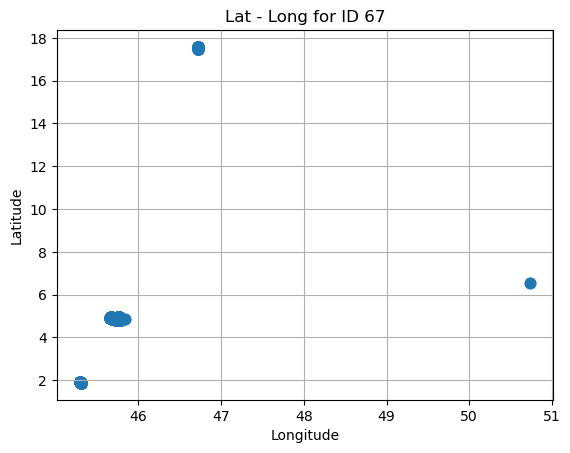

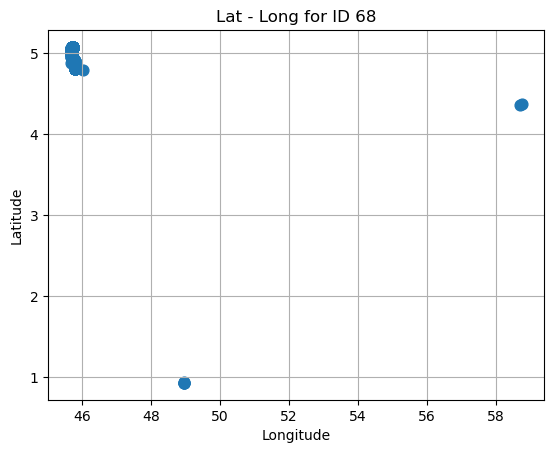

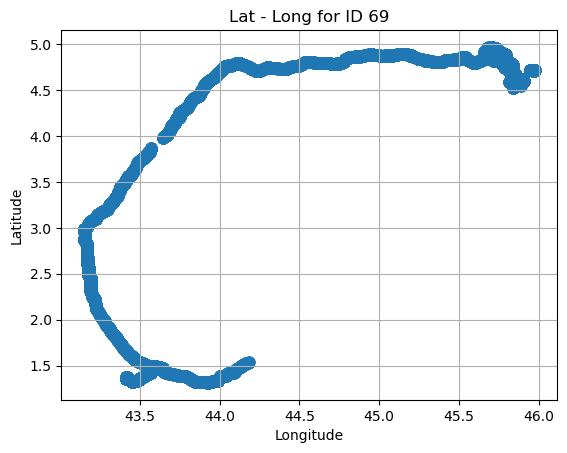

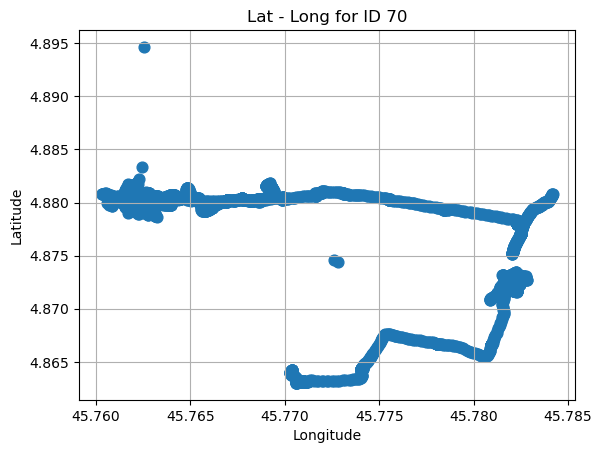

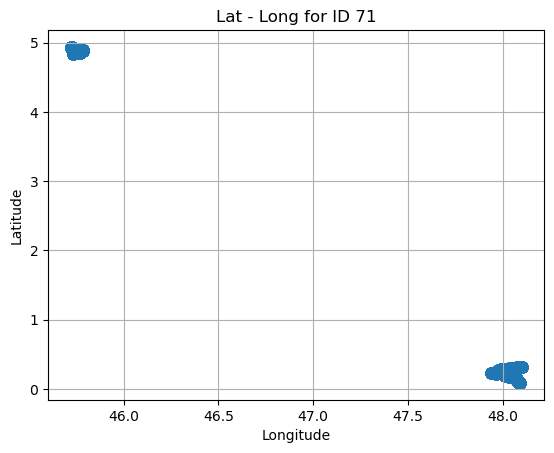

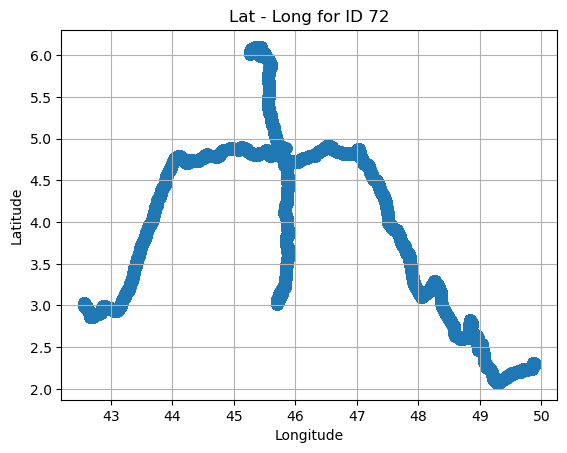

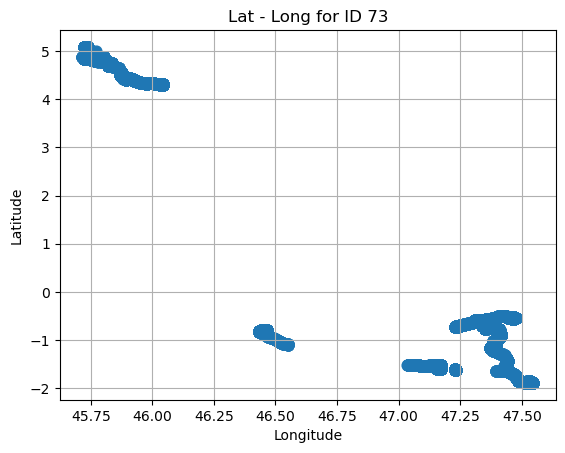

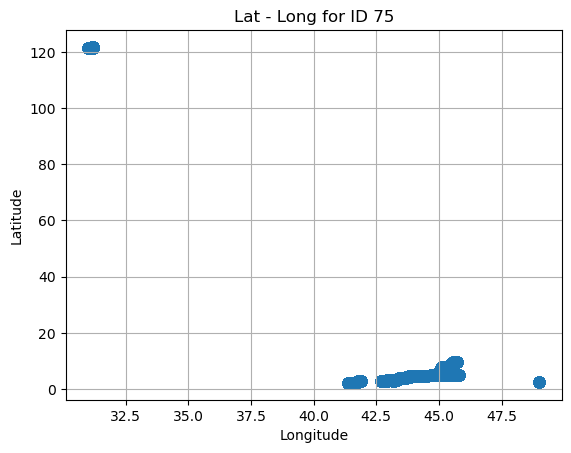

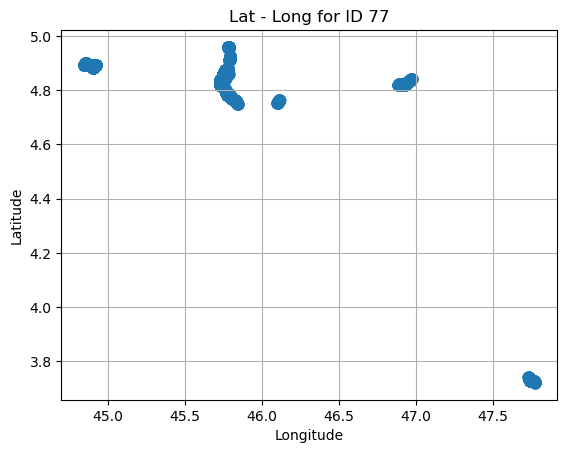

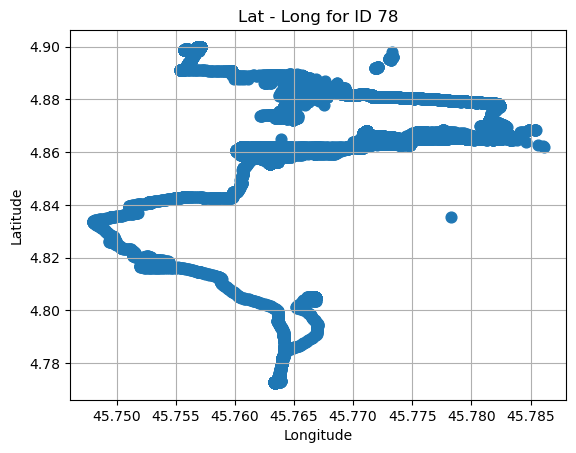

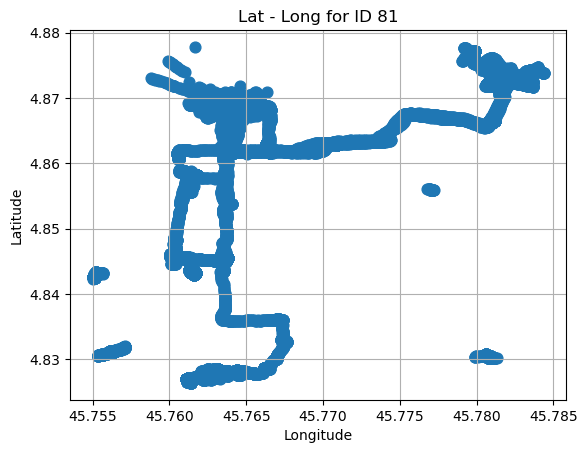

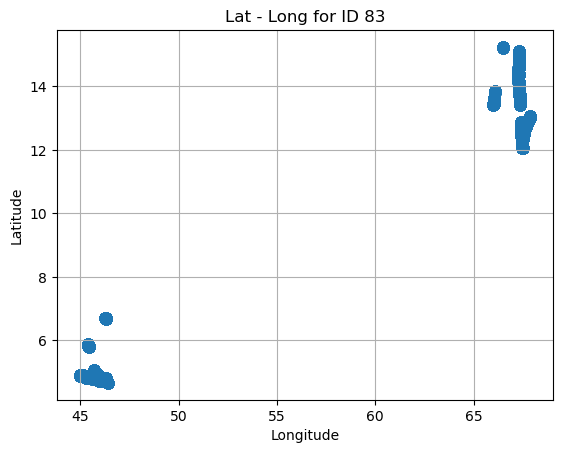

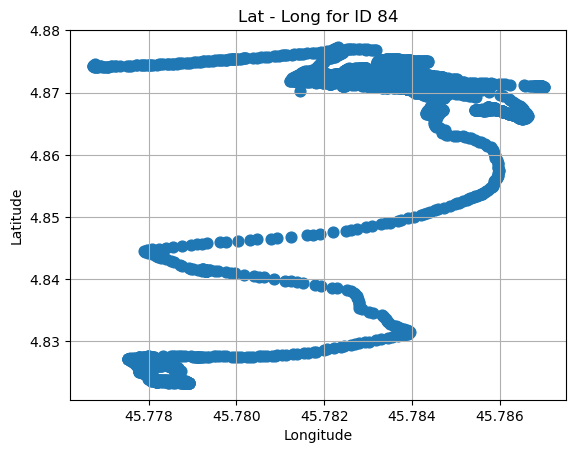

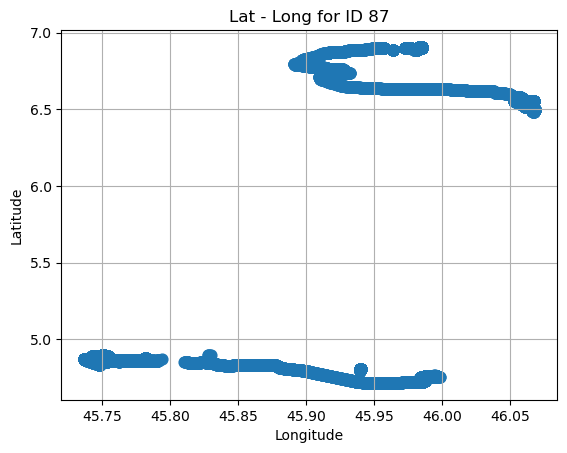

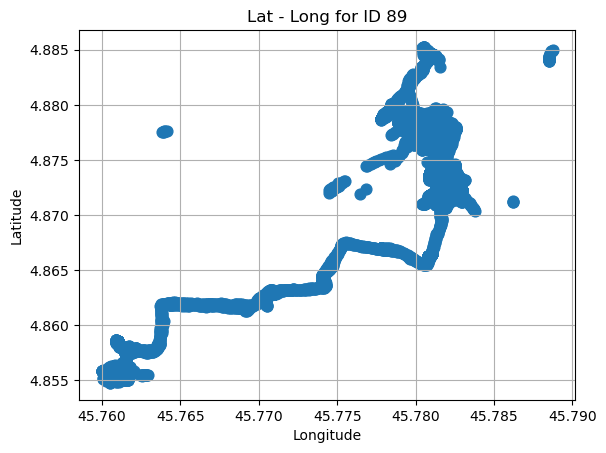

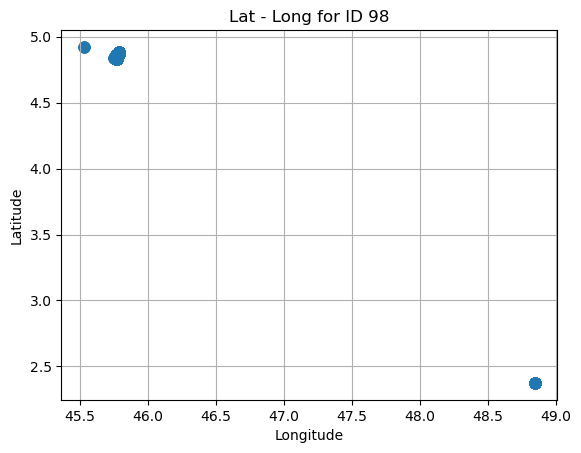

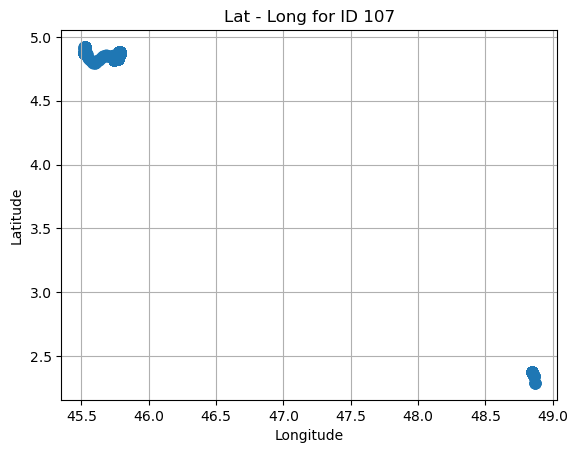

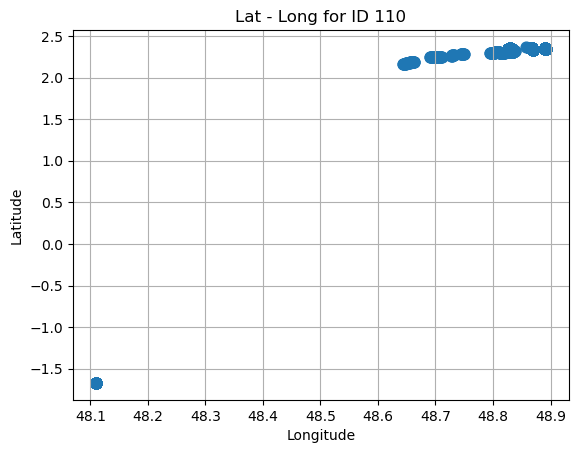

In [4]:
import matplotlib.pyplot as plt

print(df)
for name, group in df.groupby('id'):
    plt.scatter(group['longitude'], group['latitude'], marker='o', s=60)
    plt.title(f'Lat - Long for ID {name}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()

           id                date  latitude  longitude  week
0           1 2015-03-04 00:35:00  4.870147  45.772140    10
1           1 2015-03-04 00:35:00  4.870218  45.772095    10
2           1 2015-03-04 00:35:00  4.870210  45.772072    10
3           1 2015-03-04 00:35:00  4.870210  45.772072    10
4           1 2015-03-04 00:35:00  4.870210  45.772072    10
...       ...                 ...       ...        ...   ...
34551844  110 2015-03-12 16:23:00  2.343094  48.891650    11
34551845  110 2015-03-12 16:23:00  2.343094  48.891650    11
34551846  110 2015-03-12 16:23:00  2.343094  48.891649    11
34551847  110 2015-03-12 16:23:00  2.343094  48.891649    11
34551848  110 2015-03-12 19:29:00  2.343127  48.891772    11

[34551849 rows x 5 columns]


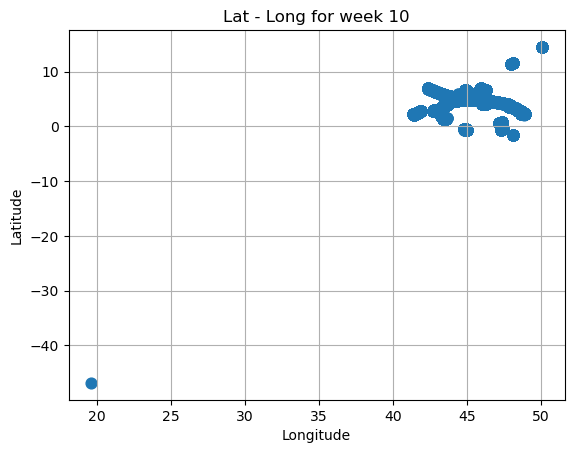

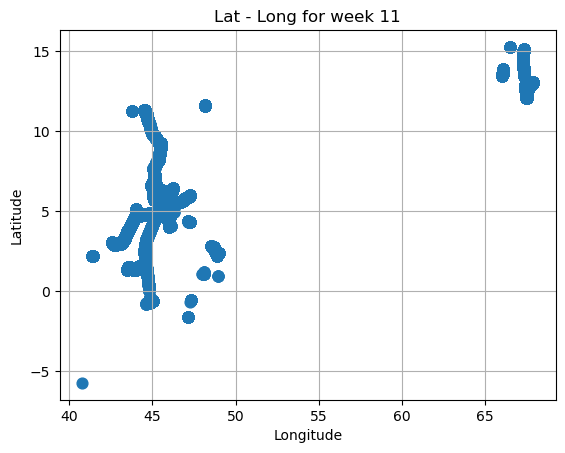

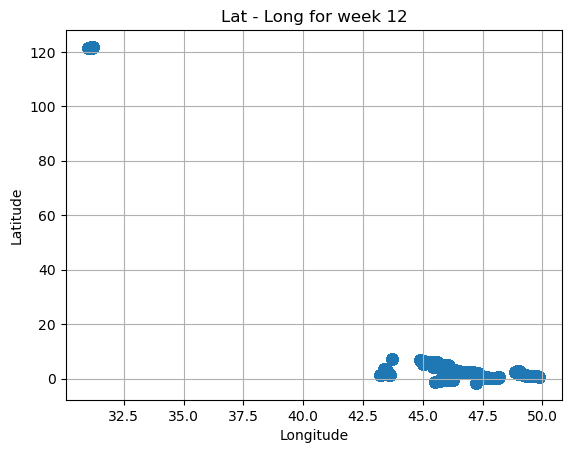

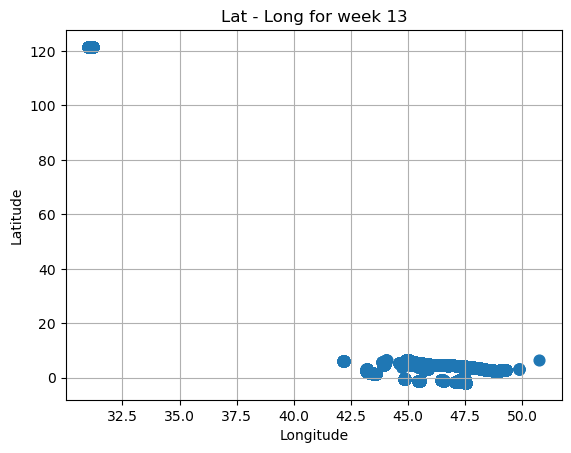

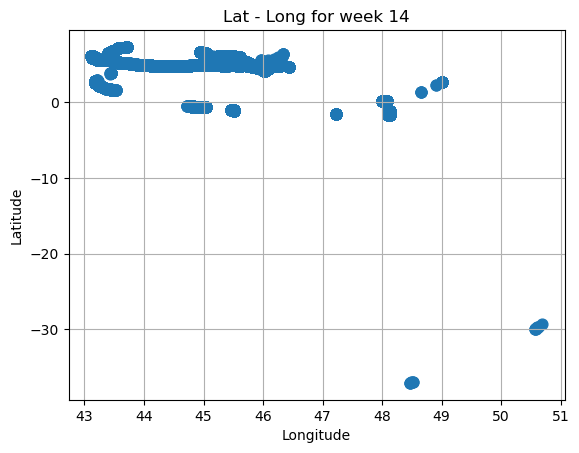

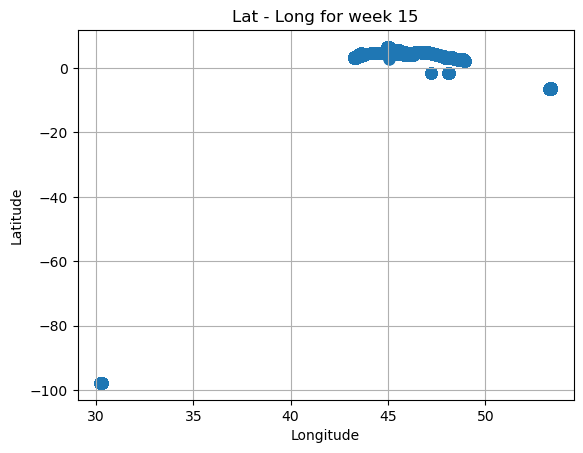

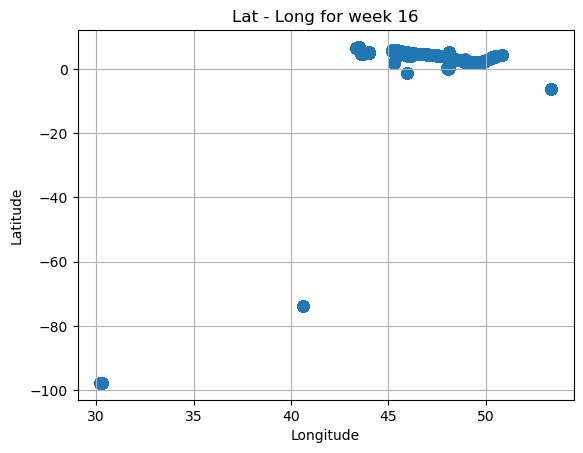

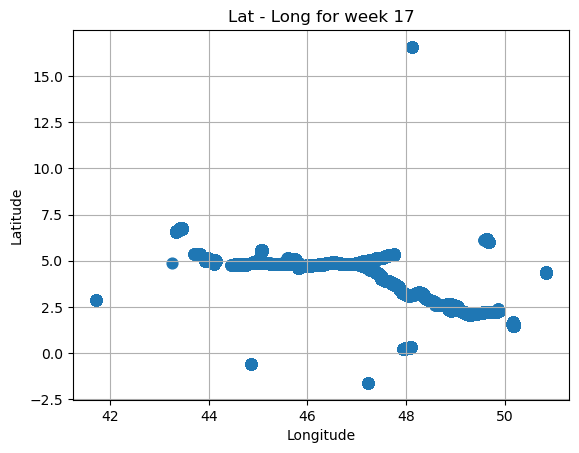

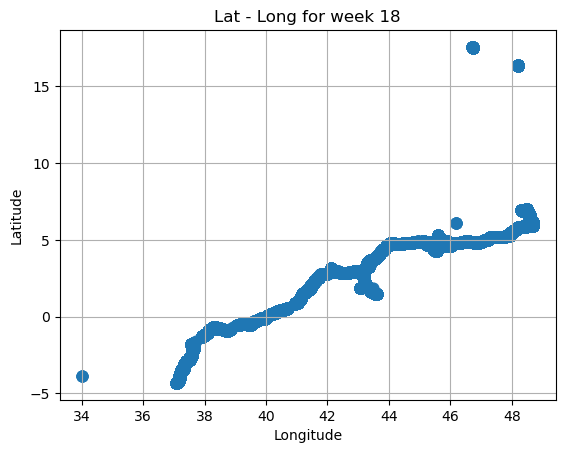

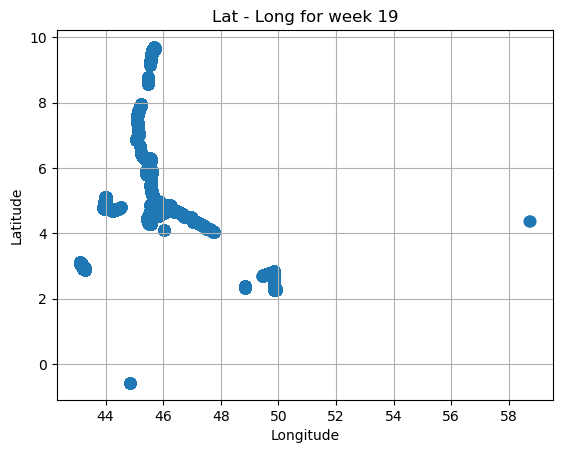

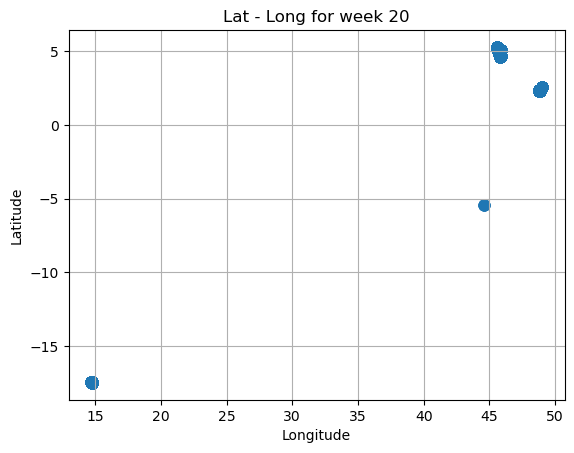

In [6]:
import matplotlib.pyplot as plt

print(df)
for name, group in df.groupby('week'):
    plt.scatter(group['longitude'], group['latitude'], marker='o', s=60)
    plt.title(f'Lat - Long for week {name}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()

In [7]:
id_week_ori = df.groupby('id')['week'].unique()
list_id_ori = df["id"].unique()
print(np.sort(list_id_ori), len(list_id_ori))

[  1   2   4   5   6   7   8   9  11  13  14  15  16  17  18  21  23  24
  25  26  27  28  29  30  31  32  34  35  36  37  38  39  41  42  43  44
  48  49  50  51  52  53  54  55  58  59  60  62  63  65  66  67  68  69
  70  71  72  73  75  77  78  81  83  84  87  89  98 107 110] 69


In [8]:
#Group id--week--moyen_latitude--moyen_longitude--mean_date--count_line--mean_hour

#Original Table
df['hour'] = df['date'].dt.hour
mean_hour = df.groupby(['id','week'])['hour'].mean()

mean_lat_ori = df.groupby(['id','week'])['latitude'].mean()
mean_long_ori = df.groupby(['id','week'])['longitude'].mean()

mean_date_ori = df.groupby(['id','week'])['date'].mean()
count_ligne_ori = df.groupby(['id','week'])['date'].count()
mean_hour_ori = df.groupby(['id','week'])['hour'].mean()

ori_mean = df[['id','week']].drop_duplicates().reset_index(drop=True)
ori_mean['mean_latitude'] = ori_mean.apply(lambda x: mean_lat_ori[x.id][x.week], axis=1)
ori_mean['mean_longitude'] = ori_mean.apply(lambda x: mean_long_ori[x.id][x.week], axis=1)
ori_mean['mean_date'] = ori_mean.apply(lambda x: mean_date_ori[x.id][x.week], axis=1)
ori_mean['count_line'] = ori_mean.apply(lambda x: count_ligne_ori[x.id][x.week], axis=1)
ori_mean['mean_hour'] = ori_mean.apply(lambda x: mean_hour[x.id][x.week], axis=1)

In [9]:
print(mean_lat_ori)
print(mean_long_ori)
print(mean_date_ori) 
print(count_ligne_ori)
print(mean_hour_ori)

id   week
1    10      4.827873
     11      4.876658
     12      3.315934
     13      4.411797
     14      4.875356
               ...   
107  10      4.870500
     11      4.764978
     12      4.879813
110  10     -0.119641
     11      2.344631
Name: latitude, Length: 449, dtype: float64
id   week
1    10      45.592419
     11      45.781152
     12      44.737925
     13      45.429105
     14      45.774198
               ...    
107  10      45.774327
     11      45.862149
     12      45.786341
110  10      48.404082
     11      48.884047
Name: longitude, Length: 449, dtype: float64
id   week
1    10     2015-03-05 21:39:07.527484928
     11     2015-03-13 14:25:11.006843136
     12     2015-03-19 23:50:54.719796480
     13     2015-03-27 05:09:54.252334592
     14     2015-04-02 16:30:12.192103680
                         ...             
107  10     2015-03-07 04:27:02.706065408
     11     2015-03-13 22:06:22.832617984
     12     2015-03-17 11:12:29.716608000
110  10 

In [10]:
for week, group in df.groupby('week'):
    print(f'Week {week}:')
    df_week = df[df['week'] == week]
    count_id_ori_week = df_week['id'].value_counts().reset_index()
    count_id_ori_week.columns = ['id', 'count']
    count_id_ori_week = count_id_ori_week.sort_values(by='count', ascending=True)
    list_count_id_ori_week = count_id_ori_week['id'].tolist()
    print(list_count_id_ori_week, len(list_count_id_ori_week))
    print()

Week 10:
[98, 18, 63, 107, 5, 66, 78, 32, 30, 77, 68, 29, 48, 110, 35, 2, 13, 83, 73, 60, 67, 25, 71, 16, 34, 24, 49, 1, 39, 41, 21, 89, 23, 72, 43, 54, 59, 26, 9, 28, 17, 37, 75, 58, 44, 15, 51, 31, 8, 14, 7, 52, 50, 27, 55, 87, 36, 11, 69, 42, 4, 38, 62, 6] 64

Week 11:
[29, 98, 5, 48, 58, 30, 77, 107, 110, 21, 78, 63, 68, 54, 25, 49, 37, 6, 1, 75, 60, 16, 13, 23, 34, 67, 89, 2, 83, 14, 41, 15, 24, 11, 52, 36, 9, 26, 44, 59, 73, 43, 8, 31, 28, 7, 17, 55, 72, 62, 87, 4, 38, 51, 50, 69, 27, 42, 53] 59

Week 12:
[34, 63, 38, 84, 65, 16, 55, 71, 78, 68, 70, 15, 77, 30, 107, 1, 9, 24, 44, 18, 32, 53, 6, 81, 66, 41, 52, 8, 2, 60, 75, 49, 26, 72, 67, 69, 43, 42, 51, 62, 31, 59, 13, 73, 28, 50, 87, 7, 17, 27, 4] 51

Week 13:
[44, 71, 77, 29, 70, 9, 84, 43, 54, 18, 41, 63, 49, 35, 52, 60, 24, 68, 83, 30, 32, 78, 66, 1, 51, 65, 17, 75, 67, 2, 8, 13, 28, 59, 72, 31, 73, 81, 62, 69, 7, 26, 27, 42, 53, 6, 50, 4] 48

Week 14:
[71, 17, 52, 78, 9, 84, 29, 35, 54, 70, 68, 53, 27, 32, 63, 66, 49, 75, 

In [7]:
for week, group in df.groupby('week'):
    print(f'Week {week}:')
    df_week = df[df['week'] == week]    
    count_id_ori_each_week = df_week['id'].value_counts().reset_index()
    count_id_ori_each_week.columns = ['id', 'count']

    print(count_id_ori_each_week)

Week 10:
     id   count
0     6  238005
1    62  209941
2    38  200805
3     4  198951
4    42  183845
..  ...     ...
59    5    4110
60  107    3215
61   63    1221
62   18     923
63   98     444

[64 rows x 2 columns]
Week 11:
     id   count
0    53  311171
1    42  288453
2    27  256638
3    69  243740
4    50  241614
5    51  216169
6    38  208422
7     4  195647
8    87  195320
9    62  190390
10   72  163536
11   55  159087
12   17  149269
13    7  140274
14   28  137035
15   31  136774
16    8  136629
17   43  134535
18   73  122894
19   59  121514
20   44  116557
21   26  113238
22    9  109638
23   36   91063
24   52   84146
25   11   76972
26   24   74595
27   15   67135
28   41   62907
29   14   57700
30   83   57338
31    2   56993
32   89   54949
33   67   53496
34   34   51920
35   23   40703
36   13   39178
37   16   38757
38   60   35893
39   75   35739
40    1   32587
41    6   29598
42   37   26438
43   49   23574
44   25   20949
45   54   19377
46   68   16790

In [3]:
#Random minute : returns a new date by adding or subtracting the random number of minutes, depending on whether the hour remains the same.
def random_minute(date):
    rand_min = random.randint(-29,29)
    return date - dt.timedelta(minutes=rand_min) if date.hour == (date - dt.timedelta(minutes=rand_min)).hour else date + dt.timedelta(minutes=rand_min)

#Change date to random (same week)
def change_date(date):
    rand_day = int(np.random.choice([-1,0,1], p=[0.02, 0.96, 0.02]))
    return date - dt.timedelta(days=rand_day) if date.isocalendar()[1] == (date - dt.timedelta(days=rand_day)).isocalendar()[1] else date + dt.timedelta(days=rand_day)

In [4]:
#Set id to 'DEL' with lines duplicated and retain only the first occurrence of each unique combination of values in these columns.
id_time = df.drop_duplicates(['id', 'date', 'latitude', 'longitude'])
print(id_time.shape)

index_not_change = np.array(id_time.index)
df.loc[~df.index.isin(index_not_change) , 'id'] = "DEL"

print(df.head())

(16654892, 5)
    id                date  latitude  longitude  week
0    1 2015-03-04 00:35:00  4.870147  45.772140    10
1    1 2015-03-04 00:35:00  4.870218  45.772095    10
2    1 2015-03-04 00:35:00  4.870210  45.772072    10
3  DEL 2015-03-04 00:35:00  4.870210  45.772072    10
4  DEL 2015-03-04 00:35:00  4.870210  45.772072    10


In [5]:
df

,id,date,latitude,longitude,week
0,1,2015-03-04 00:35:00,4.870147,45.772140,10
1,1,2015-03-04 00:35:00,4.870218,45.772095,10
2,1,2015-03-04 00:35:00,4.870210,45.772072,10
3,DEL,2015-03-04 00:35:00,4.870210,45.772072,10
4,DEL,2015-03-04 00:35:00,4.870210,45.772072,10
...,...,...,...,...,...
34551844,110,2015-03-12 16:23:00,2.343094,48.891650,11
34551845,110,2015-03-12 16:23:00,2.343094,48.891650,11
34551846,110,2015-03-12 16:23:00,2.343094,48.891649,11
34551847,110,2015-03-12 16:23:00,2.343094,48.891649,11


In [6]:
#Change lat-long
df['latitude'] = df['latitude'] + 0.005 * np.cos(df['latitude'])
df['longitude'] = df['longitude'] + 0.005 * np.sin(df['longitude'])

In [7]:
#Apply random_minute for the ids not DEL
df.loc[df['id'] != 'DEL', 'date'] = df.loc[df['id'] != 'DEL', 'date'].apply(random_minute)

#Apply change_date for the ids not DEL
df.loc[df['id'] != 'DEL', 'date'] = df.loc[df['id'] != 'DEL', 'date'].apply(change_date) 

In [8]:
df

,id,date,latitude,longitude,week
0,1,2015-03-04 00:53:00,4.870932,45.777021,10
1,1,2015-03-04 00:06:00,4.871004,45.776976,10
2,1,2015-03-04 00:27:00,4.870996,45.776952,10
3,DEL,2015-03-04 00:35:00,4.870996,45.776952,10
4,DEL,2015-03-04 00:35:00,4.870996,45.776952,10
...,...,...,...,...,...
34551844,110,2015-03-12 16:20:00,2.339605,48.886746,11
34551845,110,2015-03-12 16:51:00,2.339605,48.886746,11
34551846,110,2015-03-12 16:11:00,2.339605,48.886746,11
34551847,110,2015-03-12 16:40:00,2.339605,48.886746,11


In [9]:
df['latitude'] = df['latitude'].round(decimals=2)
df['longitude'] = df['longitude'].round(decimals=2)

In [10]:
df

,id,date,latitude,longitude,week
0,1,2015-03-04 00:53:00,4.87,45.78,10
1,1,2015-03-04 00:06:00,4.87,45.78,10
2,1,2015-03-04 00:27:00,4.87,45.78,10
3,DEL,2015-03-04 00:35:00,4.87,45.78,10
4,DEL,2015-03-04 00:35:00,4.87,45.78,10
...,...,...,...,...,...
34551844,110,2015-03-12 16:20:00,2.34,48.89,11
34551845,110,2015-03-12 16:51:00,2.34,48.89,11
34551846,110,2015-03-12 16:11:00,2.34,48.89,11
34551847,110,2015-03-12 16:40:00,2.34,48.89,11


In [11]:
for week, group in id_time.groupby('week'):
    print(f'Week {week}:')
    id_time_week = id_time[id_time['week'] == week]    
    count_id_ori_each_week = id_time_week['id'].value_counts().reset_index()
    count_id_ori_each_week.columns = ['id', 'count']

    print(count_id_ori_each_week)

Week 10:
     id   count
0     6  222194
1     4  117768
2    11   97240
3    38   87014
4    42   66530
..  ...     ...
59   66    2992
60  107    2210
61   63     921
62   18     752
63   98     344

[64 rows x 2 columns]
Week 11:
     id   count
0    50  126067
1    69  121589
2    27  116479
3    51  113625
4     4  109532
5    42   99890
6    38   97228
7    53   93147
8    72   92751
9     8   77954
10   28   74121
11   55   67150
12    9   66603
13   43   62098
14    7   57972
15   26   52211
16   59   51345
17   17   49828
18   31   48240
19    2   44983
20   44   44204
21   11   41443
22   24   41126
23   87   40434
24   15   38426
25   52   38146
26   14   36644
27   89   32242
28   67   32093
29   73   30715
30   62   26404
31    6   26272
32   83   25460
33   23   24810
34   34   24373
35    1   22629
36   36   22407
37   13   22142
38   41   22126
39   75   20946
40   25   15693
41   60   13751
42   37   12962
43   68   12558
44   54   10233
45   63   10210
46   49    9690

In [11]:
#Id anonymisation
id_time['new_id'] =  id_time['id'] + np.cos(id_time['week'] / 2)

id_time['new_id'] = id_time['new_id'].apply(lambda x: abs(int(10000 * np.tan(x))))
df.loc[df['id'] != 'DEL', 'id'] = id_time['new_id']

C:\Users\Phuoc Le\AppData\Local\Temp\ipykernel_3840\2757611014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_time['new_id'] =  id_time['id'] + np.cos(id_time['week'] / 2)
C:\Users\Phuoc Le\AppData\Local\Temp\ipykernel_3840\2757611014.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_time['new_id'] = id_time['new_id'].apply(lambda x: abs(int(10000 * np.tan(x))))


In [12]:
df

,id,date,latitude,longitude,week
0,33864,2015-03-04 00:53:00,4.87,45.78,10
1,33864,2015-03-04 00:06:00,4.87,45.78,10
2,33864,2015-03-04 00:27:00,4.87,45.78,10
3,DEL,2015-03-04 00:35:00,4.87,45.78,10
4,DEL,2015-03-04 00:35:00,4.87,45.78,10
...,...,...,...,...,...
34551844,9370,2015-03-12 16:20:00,2.34,48.89,11
34551845,9370,2015-03-12 16:51:00,2.34,48.89,11
34551846,9370,2015-03-12 16:11:00,2.34,48.89,11
34551847,9370,2015-03-12 16:40:00,2.34,48.89,11


In [56]:
for week, group in new_df.groupby('week'):
    print(f'Week {week}:')
    new_df_week = new_df[new_df['week'] == week]    
    count_id_ori_each_week = new_df_week['id'].value_counts().reset_index()
    count_id_ori_each_week.columns = ['id', 'count']

    print(count_id_ori_each_week)

Week 10:
       id   count
0       4  222194
1   21877  117768
2   33745   97240
3    6616   87014
4   77797   66530
..    ...     ...
59   3205    2992
60   5073    2210
61   4852     921
62   6351     752
63  12454     344

[64 rows x 2 columns]
Week 11:
         id   count
0      4746  126067
1      6748  121589
2      6348  116479
3     77938  113625
4   2688733  109532
5     32654   99890
6     15906   97228
7      3110   93147
8      4855   92751
9      8702   77954
10     4638   74121
11    11156   67150
12     2917   66603
13     2806   62098
14    68332   57972
15  1948457   52211
16      184   51345
17    21809   49828
18     3014   48240
19     4621   44983
20     8884   44204
21    11561   41443
22     4514   41126
23     2616   40434
24        7   38426
25     8395   38146
26    15549   36644
27    57131   32242
28    60267   32093
29    83808   30715
30     1238   26404
31     4531   26272
32    20364   25460
33    67664   24810
34     1523   24373
35    72070   22629
36 

In [13]:
df.loc[df['id'].isin([8884, 21891, 6296, 15771, 240748, 10074, 19292644, 2386550, 19440]), 'id'] = 'DEL'

In [18]:
new_df = df.loc[df['id'] != 'DEL']

In [19]:
new_df

,id,date,latitude,longitude,week
0,33864,2015-03-04 00:06:00,4.87,45.78,10
1,33864,2015-03-04 00:58:00,4.87,45.78,10
2,33864,2015-03-04 00:11:00,4.87,45.78,10
10,33864,2015-03-04 00:10:00,4.87,45.78,10
29,33864,2015-03-04 00:15:00,4.87,45.78,10
...,...,...,...,...,...
34551844,9370,2015-03-12 16:45:00,2.34,48.88,11
34551845,9370,2015-03-12 16:28:00,2.34,48.88,11
34551846,9370,2015-03-12 16:09:00,2.34,48.88,11
34551847,9370,2015-03-12 16:12:00,2.34,48.88,11


In [17]:
id_new_week_ori = new_df.groupby('id')['week'].unique()
list_id_new_ori = new_df["id"].unique()
print(np.sort(list_id_new_ori), len(list_id_new_ori))

[4 7 28 31 44 57 93 95 132 137 179 181 184 193 221 226 270 293 438 516 527
 635 637 692 694 726 781 783 813 891 902 959 1049 1110 1150 1153 1159 1195
 1238 1249 1277 1290 1306 1330 1332 1380 1393 1396 1420 1423 1457 1520
 1523 1548 1561 1574 1623 1635 1665 1693 1699 1702 1704 1743 1784 1834
 1897 2174 2231 2358 2533 2576 2593 2616 2619 2621 2665 2688 2716 2766
 2806 2809 2862 2876 2902 2917 2944 2963 2972 3014 3037 3040 3054 3060
 3068 3108 3110 3134 3151 3205 3208 3249 3316 3329 3392 3402 3415 3478
 3514 3578 3614 3714 3777 3813 3915 3980 4004 4083 4107 4204 4253 4259
 4292 4303 4305 4316 4357 4383 4411 4469 4514 4517 4520 4531 4570 4592
 4621 4633 4638 4668 4690 4699 4741 4743 4746 4792 4808 4852 4855 4881
 4901 5012 5073 5088 5200 5272 5313 5427 5498 5501 5540 5614 5656 5731
 5877 5931 6045 6052 6106 6155 6173 6225 6231 6278 6289 6314 6318 6348
 6351 6402 6413 6428 6473 6486 6490 6493 6528 6546 6616 6673 6681 6744
 6748 6810 7242 7427 7652 7793 7936 8036 8102 8174 8183 8210 8253 826

In [18]:
for week, group in new_df.groupby('week'):
    print(f'Week {week}:')
    new_df_week = new_df[new_df['week'] == week]    
    count_id_ori_each_week = new_df_week['id'].value_counts().reset_index()
    count_id_ori_each_week.columns = ['id', 'count']

    print(count_id_ori_each_week)

Week 10:
       id   count
0       4  222194
1   21877  117768
2   33745   97240
3    6616   87014
4   77797   66530
..    ...     ...
59   3205    2992
60   5073    2210
61   4852     921
62   6351     752
63  12454     344

[64 rows x 2 columns]
Week 11:
         id   count
0      4746  126067
1      6748  121589
2      6348  116479
3     77938  113625
4   2688733  109532
5     32654   99890
6     15906   97228
7      3110   93147
8      4855   92751
9      8702   77954
10     4638   74121
11    11156   67150
12     2917   66603
13     2806   62098
14    68332   57972
15  1948457   52211
16      184   51345
17    21809   49828
18     3014   48240
19     4621   44983
20    11561   41443
21     4514   41126
22     2616   40434
23        7   38426
24     8395   38146
25    15549   36644
26    57131   32242
27    60267   32093
28    83808   30715
29     1238   26404
30     4531   26272
31    20364   25460
32    67664   24810
33     1523   24373
34    72070   22629
35    15251   22407
36 

In [13]:
df = df.drop('week', axis=1)

In [18]:
# Shuffle the rows to make sure the two consecutive rows do not have the same id and without changing the indice.
df = df.sample(frac=1).reset_index(drop=True)

In [19]:
df

,id,date,latitude,longitude
0,694,2015-04-06 12:47:00,4.85,45.76
1,DEL,2015-03-15 14:42:00,4.93,45.78
2,DEL,2015-03-05 13:45:00,4.87,45.79
3,81152,2015-03-27 12:04:00,4.87,45.79
4,DEL,2015-04-16 03:00:00,4.87,45.77
...,...,...,...,...
34551844,5313,2015-04-01 23:37:00,4.87,45.79
34551845,DEL,2015-04-07 03:50:00,4.93,45.78
34551846,4357,2015-04-16 20:30:00,4.28,45.57
34551847,3068,2015-03-28 21:26:00,4.89,45.77


In [20]:
# Save file
df.to_csv('trigonometry_1_3.csv', sep = '\t', index=False, header=False, columns=None)